<a href="https://colab.research.google.com/github/Hugofbarboza/ProjetosPortfolio/blob/main/EnemVersaoGit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Sobre

O objetivo do projeto é analisar a renda, região de moradia, idade e tipo de escola frequentada dos participantes que realizaram a prova do ENEM no ano de 2019, entendendo:
1. O comportamento da renda dos participantes;
2. A correlação de renda x idade x desempenho nas provas

Para isso vamos passar por três etapas:

 - 1ª - Carregamento de arquivos excel e csv para extração dos dados;
 - 2ª - Tratamento dos dados;
 - 3ª - Visualização dos dados.


# 2 Bibliotecas

In [ ]:
# Importando bibliotecas necessárias para o projeto

# Manipulação e tratamento de dados
import numpy as np # funções matemáticas
import pandas as pd # manipulação de dados (series e dataframe)

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Avisos
import warnings
warnings.filterwarnings('ignore')

# 3 Dados (tabelas)

In [ ]:
# Arquivos para o projeto

# Carregando arquivo xlsx com pd.read_excel() - Dados do ENEM
Base_Dados = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/GitHub/PEnem/Dados_Enem - Estudo Economico.xlsx')

# Carregando arquivo csv com pd.read_csv(); usando ';' como separador - Dados regionais
Base_Regiao = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GitHub/PEnem/Dados_Regionais.csv', sep = ';')

# Carregando a aba 'Tab_Escola' do arquivo xlsx com pd.read_excel() - Dicionário
Tab_Escola = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/GitHub/PEnem/Dicionario_Enem.xlsx', 'Tab_Escola')

# Carregando a aba 'Tab_Renda' do arquivo xlsx com pd.read_excel() - Dicionário
Tab_Renda = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/GitHub/PEnem/Dicionario_Enem.xlsx', 'Tab_Renda')

#4 Exploração dos dados

##4.1 Tabela Base_Dados

In [ ]:
# Informações da tabela | .info()
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SG_UF_RESIDENCIA  9970 non-null   object 
 1   NU_IDADE          9970 non-null   int64  
 2   TP_ESCOLA         9970 non-null   int64  
 3   Q006              9970 non-null   object 
 4   NU_NOTA_CN        9970 non-null   float64
 5   NU_NOTA_CH        9970 non-null   float64
 6   NU_NOTA_LC        9970 non-null   float64
 7   NU_NOTA_MT        9970 non-null   float64
 8   NU_NOTA_REDACAO   9970 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 701.1+ KB


In [ ]:
# 5 primeiros registros | .head()
Base_Dados.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,RJ,18,2,C,377.3,366.7,478.8,453.0,280
1,PE,18,2,B,375.8,465.8,531.9,386.1,600
2,SP,18,2,D,395.9,400.4,493.7,516.8,640
3,BA,18,3,K,712.9,711.7,665.5,731.5,940
4,BA,18,2,B,346.3,494.9,519.8,391.8,640


In [ ]:
# 5 últimos registros com .tail()
Base_Dados.tail()

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
9965,RJ,17,2,I,523.5,567.5,590.9,550.1,600
9966,MG,25,2,B,411.0,549.2,545.5,529.7,380
9967,DF,18,2,G,547.3,551.5,546.5,683.1,760
9968,SP,18,2,H,549.8,532.9,566.5,522.5,640
9969,SC,17,2,D,437.9,498.6,561.4,431.3,600


In [ ]:
# Valores nulos (NaN) | .isna() - Retorna True para valores NOT A NUMBER e False PARA valores preenchidos
Base_Dados.isna().sum()

SG_UF_RESIDENCIA    0
NU_IDADE            0
TP_ESCOLA           0
Q006                0
NU_NOTA_CN          0
NU_NOTA_CH          0
NU_NOTA_LC          0
NU_NOTA_MT          0
NU_NOTA_REDACAO     0
dtype: int64

Observação:

 - isna() - detecta valores ausentes e retorna um valor booleano indicando se os valores são NA. Valores NA, como None ou numpy.NaN, são mapeados para valores True. Todo o resto é mapeado para valores False. Caracteres como strings vazias '' ou numpy.inf não são considerados valores NA (a menos que você defina pandas.options.mode.use_inf_as_na = True).

 - isnull() - DataFrame.isnull é um pseudômino para DataFrame.isna.

In [ ]:
# Linhas duplicadas | .duplicated() - Retorna True para linhas duplicadas, caso contrário, False
Base_Dados.duplicated().sum()

0

In [ ]:
# Nomes das colunas para ver se tem algum espaço | .columns
Base_Dados.columns

Index(['SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_ESCOLA', 'Q006', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'],
      dtype='object')

In [ ]:
# Valores únicos da coluna SG_UF_RESIDENCIA | .unique()
Base_Dados['SG_UF_RESIDENCIA'].unique()

array(['RJ', 'PE', 'SP', 'BA', 'CE', 'PI', 'MG', 'AM', 'RS', 'SE', 'MA',
       'RN', 'AL', 'SC', 'PR', 'AP', 'GO', 'TO', 'RO', 'DF', 'PA', 'MS',
       'PB', 'ES', 'MT', 'RR', 'AC'], dtype=object)

In [ ]:
# Valores únicos separados por coluna | .nunique()
Base_Dados.nunique()

SG_UF_RESIDENCIA      27
NU_IDADE              30
TP_ESCOLA              2
Q006                  17
NU_NOTA_CN          2947
NU_NOTA_CH          3126
NU_NOTA_LC          2613
NU_NOTA_MT          3673
NU_NOTA_REDACAO       44
dtype: int64

In [ ]:
# Dados estatísticos das colunas numéricas com | .describe()
Base_Dados.describe()

,NU_IDADE,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,9970.000000,9970.000000,9970.000000,9970.000000,9970.000000,9970.000000,9970.000000
mean,17.717452,2.137111,476.110752,507.826429,520.288385,527.776299,588.860582
std,1.374614,0.343982,76.004605,80.285119,63.257290,108.320815,185.308330
min,14.000000,2.000000,0.000000,0.000000,0.000000,359.000000,0.000000
25%,17.000000,2.000000,415.300000,449.300000,483.300000,440.500000,500.000000
50%,18.000000,2.000000,469.300000,511.000000,526.100000,508.100000,600.000000
75%,18.000000,2.000000,532.600000,566.400000,564.500000,602.275000,700.000000
max,52.000000,3.000000,789.900000,755.500000,727.900000,985.000000,980.000000


## 4.2 Tabela Base_Regiao

In [ ]:
# Informações da tabela | .info()
Base_Regiao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Estado   27 non-null     object
 1   Sigla    27 non-null     object
 2   Capital  27 non-null     object
 3   Região   27 non-null     object
dtypes: object(4)
memory usage: 992.0+ bytes


In [ ]:
# 5 primeiros registros | .head()
Base_Regiao.head()

,Estado,Sigla,Capital,Região
0,Roraima,RR,Boa Vista,Norte
1,Amapá,AP,Macapá,Norte
2,Amazonas,AM,Manaus,Norte
3,Pará,PA,Belém,Norte
4,Acre,AC,Rio Branco,Norte


In [ ]:
# 5 últimos registros | .tail()
Base_Regiao.tail()

,Estado,Sigla,Capital,Região
22,Rio de Janeiro,RJ,Rio de Janeiro,Sudeste
23,São Paulo,SP,São Paulo,Sudeste
24,Paraná,PR,Curitiba,Sul
25,Santa Catarina,SC,Florianópolis,Sul
26,Rio Grande do sul,RS,Porto Alegre,Sul


In [ ]:
# Valores nulos (NaN) | .isna()
Base_Regiao.isna().sum()

Estado     0
Sigla      0
Capital    0
Região     0
dtype: int64

In [ ]:
# Verificando nomes das colunas para ver se tem algum espaço | .columns
Base_Regiao.columns

Index(['Estado', 'Sigla', 'Capital', 'Região'], dtype='object')

In [ ]:
# Linhas duplicadas | .duplicated()
Base_Regiao.duplicated().sum()

0

In [ ]:
# Valores únicos da coluna Sigla | .unique()
Base_Regiao['Sigla'].unique()

array(['RR', 'AP', 'AM', 'PA', 'AC', 'RO', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MT', 'DF', 'GO', 'MS', 'MG', 'ES',
       'RJ', 'SP', 'PR', 'SC', 'RS'], dtype=object)

In [ ]:
# Valores únicos separados por coluna | .nunique()
Base_Regiao.nunique()

Estado     27
Sigla      27
Capital    27
Região      5
dtype: int64

## 4.3 Tabela Tab_Escola

In [ ]:
# Informações da tabela | .info()
Tab_Escola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      4 non-null      int64 
 1   Opção   4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [ ]:
# Visualizando a tabela
Tab_Escola

,Id,Opção
0,1,Não Respondeu
1,2,Pública
2,3,Privada
3,4,Exterior


In [ ]:
# Verificando nomes das colunas para ver se tem algum espaço | .columns
Tab_Escola.columns

Index(['Id', 'Opção'], dtype='object')

## 4.4 Tabela Tab_Renda

In [ ]:
# Informações da tabela | .info()
Tab_Renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      17 non-null     object
 1   Renda   17 non-null     object
dtypes: object(2)
memory usage: 400.0+ bytes


In [ ]:
# 5 primeiros registros | .head()
Tab_Renda.head()

,Id,Renda
0,A,Nenhuma renda.
1,B,"Até R$ 998,00."
2,C,"De R$ 998,01 até R$ 1.497,00."
3,D,"De R$ 1.497,01 até R$ 1.996,00."
4,E,"De R$ 1.996,01 até R$ 2.495,00."


In [ ]:
# 5 últimos registros | .tail()
Tab_Renda.tail()

,Id,Renda
12,M,"De R$ 8.982,01 até R$ 9.980,00."
13,N,"De R$ 9.980,01 até R$ 11.976,00."
14,O,"De R$ 11.976,01 até R$ 14.970,00."
15,P,"De R$ 14.970,01 até R$ 19.960,00."
16,Q,"Mais de R$ 19.960,00."


In [ ]:
# Valores nulos (NaN) | .isna()
Tab_Renda.isna().sum()

Id       0
Renda    0
dtype: int64

In [ ]:
# Linhas duplicadas | .duplicated()
Tab_Renda.duplicated().sum()

0

In [ ]:
# Verificando nomes das colunas para ver se tem algum espaço | .columns
Tab_Renda.columns

Index(['Id', 'Renda'], dtype='object')

In [ ]:
# Valores únicos separados por coluna | .nunique()
Tab_Renda.nunique()

Id       17
Renda    17
dtype: int64

In [ ]:
# Valores distintos da coluna Q006 | .unique()
Tab_Renda['Id'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

# 5 Transformação dos dados

Será realizada a troca do nome de algumas colunas das tabelas para que, posteriormente, sejam unificadas através dos campos indicados com dados em comum.

In [ ]:
Base_Regiao.head(1)

,Estado,Sigla,Capital,Região
0,Roraima,RR,Boa Vista,Norte


In [ ]:
# Renomeando a coluna 'Sigla' para 'SG_UF_REDISENCIA' - Tabela Base_Regiao | .rename()
Base_Regiao.rename(columns = {'Sigla': 'SG_UF_RESIDENCIA'},
                   inplace = True) # inplace = True para a alteração ser definitiva

In [ ]:
Base_Regiao.head(1)

,Estado,SG_UF_RESIDENCIA,Capital,Região
0,Roraima,RR,Boa Vista,Norte


In [ ]:
Base_Dados.head(1)

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,RJ,18,2,C,377.3,366.7,478.8,453.0,280


In [ ]:
Base_Regiao.head(1)

,Estado,SG_UF_RESIDENCIA,Capital,Região
0,Roraima,RR,Boa Vista,Norte


In [ ]:
# Cruzando as tabela Base_Dados e Base_Regiao atráves de dados em comum da coluna 'SG_UF_RESIDENCIA' | pd.merge()
Base_Cruzada = pd.merge(Base_Dados, Base_Regiao,
                        on = ['SG_UF_RESIDENCIA'], how = 'outer') # JOIN com a coluna SG_UF_RESIDENCIA

In [ ]:
Base_Cruzada.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Estado,Capital,Região
0,RJ,18,2,C,377.3,366.7,478.8,453.0,280,Rio de Janeiro,Rio de Janeiro,Sudeste
1,RJ,18,3,C,536.4,363.6,514.1,439.5,560,Rio de Janeiro,Rio de Janeiro,Sudeste
2,RJ,19,2,B,547.5,551.1,549.1,585.1,840,Rio de Janeiro,Rio de Janeiro,Sudeste
3,RJ,17,2,G,601.2,652.2,635.6,734.1,640,Rio de Janeiro,Rio de Janeiro,Sudeste
4,RJ,18,3,I,578.2,562.2,524.0,662.4,600,Rio de Janeiro,Rio de Janeiro,Sudeste


In [ ]:
# Excluindo as colunas Estado e Capital com | .drop()
Base_Cruzada.drop(columns = ['Estado', 'Capital'], inplace = True)

Base_Cruzada.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Região
0,RJ,18,2,C,377.3,366.7,478.8,453.0,280,Sudeste
1,RJ,18,3,C,536.4,363.6,514.1,439.5,560,Sudeste
2,RJ,19,2,B,547.5,551.1,549.1,585.1,840,Sudeste
3,RJ,17,2,G,601.2,652.2,635.6,734.1,640,Sudeste
4,RJ,18,3,I,578.2,562.2,524.0,662.4,600,Sudeste


In [ ]:
Tab_Escola.head(1)

,Id,Opção
0,1,Não Respondeu


In [ ]:
# Renomeando a coluna da Tab_Escola de "Id" para "TP_ESCOLA" | .rename()
Tab_Escola.rename(columns = {'Id': 'TP_ESCOLA'}, inplace = True)

In [ ]:
Tab_Escola.head(1)

,TP_ESCOLA,Opção
0,1,Não Respondeu


In [ ]:
# Cruzando as tabela Base_Cruzada e Tab_Escola atráves de dados em comum da coluna 'TP_ESCOLA'' | pd.merge()
Base_Cruzada = pd.merge(Base_Cruzada, Tab_Escola,
                        on = ['TP_ESCOLA'], how = 'outer') # JOIN com a coluna TP_ESCOLA

In [ ]:
Base_Cruzada.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Região,Opção
0,RJ,18.0,2,C,377.3,366.7,478.8,453.0,280.0,Sudeste,Pública
1,RJ,19.0,2,B,547.5,551.1,549.1,585.1,840.0,Sudeste,Pública
2,RJ,17.0,2,G,601.2,652.2,635.6,734.1,640.0,Sudeste,Pública
3,RJ,20.0,2,E,456.9,547.1,592.0,532.4,480.0,Sudeste,Pública
4,RJ,17.0,2,K,411.0,580.9,507.6,560.2,520.0,Sudeste,Pública


In [ ]:
Tab_Renda.head(1)

,Id,Renda
0,A,Nenhuma renda.


In [ ]:
# Renomeando a coluna da Tab_Renda de Id para Q006 | .rename()
Tab_Renda.rename(columns = {'Id': 'Q006'}, inplace = True)

In [ ]:
Base_Cruzada.head(1)

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Região,Opção
0,RJ,18.0,2,C,377.3,366.7,478.8,453.0,280.0,Sudeste,Pública


In [ ]:
Tab_Renda.head(1)

,Q006,Renda
0,A,Nenhuma renda.


In [ ]:
# Cruzando as tabelas Base_Cruzada e Tab_Renda atráves de dados em comum da coluna 'Q006'' | pd.merge()
Base_Cruzada = pd.merge(Base_Cruzada, Tab_Renda,
                        on = ['Q006'], how = 'outer') # JOIN com a coluna Q006

In [ ]:
Base_Cruzada.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Região,Opção,Renda
0,RJ,18.0,2,C,377.3,366.7,478.8,453.0,280.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00."
1,RJ,18.0,2,C,572.8,631.1,562.7,738.1,700.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00."
2,RJ,18.0,2,C,378.0,330.7,331.9,395.8,0.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00."
3,RJ,18.0,2,C,598.6,618.5,610.9,651.2,800.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00."
4,RJ,17.0,2,C,534.1,615.8,610.4,508.8,840.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00."


## 5.1 Tabela Base_Cruzada

In [ ]:
Base_Cruzada.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Região,Opção,Renda
0,RJ,18.0,2,C,377.3,366.7,478.8,453.0,280.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00."
1,RJ,18.0,2,C,572.8,631.1,562.7,738.1,700.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00."
2,RJ,18.0,2,C,378.0,330.7,331.9,395.8,0.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00."
3,RJ,18.0,2,C,598.6,618.5,610.9,651.2,800.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00."
4,RJ,17.0,2,C,534.1,615.8,610.4,508.8,840.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00."


In [ ]:
Base_Cruzada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9972 entries, 0 to 9971
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SG_UF_RESIDENCIA  9970 non-null   object 
 1   NU_IDADE          9970 non-null   float64
 2   TP_ESCOLA         9972 non-null   int64  
 3   Q006              9970 non-null   object 
 4   NU_NOTA_CN        9970 non-null   float64
 5   NU_NOTA_CH        9970 non-null   float64
 6   NU_NOTA_LC        9970 non-null   float64
 7   NU_NOTA_MT        9970 non-null   float64
 8   NU_NOTA_REDACAO   9970 non-null   float64
 9   Região            9970 non-null   object 
 10  Opção             9972 non-null   object 
 11  Renda             9970 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1012.8+ KB


In [ ]:
# Valores nulos (NaN) | .isna()
Base_Cruzada.isna().sum()

SG_UF_RESIDENCIA    2
NU_IDADE            2
TP_ESCOLA           0
Q006                2
NU_NOTA_CN          2
NU_NOTA_CH          2
NU_NOTA_LC          2
NU_NOTA_MT          2
NU_NOTA_REDACAO     2
Região              2
Opção               0
Renda               2
dtype: int64

In [ ]:
# Valores únicos separados por coluna | .nunique()
Base_Cruzada.nunique()

SG_UF_RESIDENCIA      27
NU_IDADE              30
TP_ESCOLA              4
Q006                  17
NU_NOTA_CN          2947
NU_NOTA_CH          3126
NU_NOTA_LC          2613
NU_NOTA_MT          3673
NU_NOTA_REDACAO       44
Região                 5
Opção                  4
Renda                 17
dtype: int64

In [ ]:
# Dados estatísticos das colunas numéricas com | .describe()
Base_Cruzada.describe()

,NU_IDADE,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,9970.000000,9972.000000,9970.000000,9970.000000,9970.000000,9970.000000,9970.000000
mean,17.717452,2.137184,476.110752,507.826429,520.288385,527.776299,588.860582
std,1.374614,0.344641,76.004605,80.285119,63.257290,108.320815,185.308330
min,14.000000,1.000000,0.000000,0.000000,0.000000,359.000000,0.000000
25%,17.000000,2.000000,415.300000,449.300000,483.300000,440.500000,500.000000
50%,18.000000,2.000000,469.300000,511.000000,526.100000,508.100000,600.000000
75%,18.000000,2.000000,532.600000,566.400000,564.500000,602.275000,700.000000
max,52.000000,4.000000,789.900000,755.500000,727.900000,985.000000,980.000000


In [ ]:
# Moda (valores com maior frequência) por coluna numérica | .mode()
Base_Cruzada.mode().transpose() # definindo .transpose() para deixar a tabela na vertical

,0,1,2
SG_UF_RESIDENCIA,SP,NaN,NaN
NU_IDADE,17.0,NaN,NaN
TP_ESCOLA,2.0,NaN,NaN
Q006,B,NaN,NaN
NU_NOTA_CN,446.0,NaN,NaN
NU_NOTA_CH,518.2,NaN,NaN
NU_NOTA_LC,498.2,509.1,565.7
NU_NOTA_MT,465.0,NaN,NaN
NU_NOTA_REDACAO,600.0,NaN,NaN
Região,Sudeste,NaN,NaN


Para poder analisar os dados da coluna 'Renda', vai ser preciso limpar e transformar os valores do tipo categórico para o tipo numérico. Para isso, vamos elaborar uma função que execute o tratamento dos dados, tirando os caracteres e espaços em todas as linhas da coluna.

In [ ]:
Base_Cruzada['Renda'].head()

0    De R$ 998,01 até R$ 1.497,00.
1    De R$ 998,01 até R$ 1.497,00.
2    De R$ 998,01 até R$ 1.497,00.
3    De R$ 998,01 até R$ 1.497,00.
4    De R$ 998,01 até R$ 1.497,00.
Name: Renda, dtype: object

In [ ]:
Base_Cruzada['Renda'].tail()

9967    De R$ 9.980,01 até R$ 11.976,00.
9968    De R$ 9.980,01 até R$ 11.976,00.
9969    De R$ 9.980,01 até R$ 11.976,00.
9970                                 NaN
9971                                 NaN
Name: Renda, dtype: object

In [ ]:
# limpando o primeiro registro
Base_Cruzada['Renda'][0].split('R$')[-1].strip().replace('.','').replace(',','.')

'1497.00'

In [ ]:
# Função para tratamento de dados da coluna 'Renda', tabela Base_Cruzada

def tratamento(valor_linha):
  # transforma o parâmetro valor_linha, recebido da função, em string
  output = str(valor_linha)

  # se o valor do parâmetro for 'Nenhuma renda.' vai transformá-lo em zero
  if output == 'Nenhuma renda.':
    output = 0

  else:
    # dividindo a cadeia de caracteres (string) em elementos de uma lista a partir do caracte 'R$'
    # extraindo o último elemento da lista
    output = output.split('R$')[-1]
    # substitui o caractere '.' por ''
    output = output.replace('.','')
    # substitui o caractere ',' por '.'
    output = output.replace(',','.')
    # elimina espaços do início e do fim da string
    output = output.strip()
    # transforma o tipo de dados em float
    output = float(output)

  return output


**Função apply**()

Aplica uma função ao longo de um eixo do DataFrame.

Por padrão, o tipo de retorno final é inferido do tipo de retorno da função aplicada.

In [ ]:
# função apply aplicada na coluna 'Renda'
Base_Cruzada['Renda'].apply(tratamento)

0        1497.0
1        1497.0
2        1497.0
3        1497.0
4        1497.0
         ...   
9967    11976.0
9968    11976.0
9969    11976.0
9970        NaN
9971        NaN
Name: Renda, Length: 9972, dtype: float64

In [ ]:
# adicionando uma nova coluna na Base_Cruzada
Base_Cruzada['Salário_Max'] = Base_Cruzada['Renda'].apply(tratamento)

In [ ]:
Base_Cruzada.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Região,Opção,Renda,Salário_Max
0,RJ,18.0,2,C,377.3,366.7,478.8,453.0,280.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00.",1497.0
1,RJ,18.0,2,C,572.8,631.1,562.7,738.1,700.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00.",1497.0
2,RJ,18.0,2,C,378.0,330.7,331.9,395.8,0.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00.",1497.0
3,RJ,18.0,2,C,598.6,618.5,610.9,651.2,800.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00.",1497.0
4,RJ,17.0,2,C,534.1,615.8,610.4,508.8,840.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00.",1497.0


In [ ]:
# verificando valores nulos
Base_Cruzada.isnull().sum()

SG_UF_RESIDENCIA    2
NU_IDADE            2
TP_ESCOLA           0
Q006                2
NU_NOTA_CN          2
NU_NOTA_CH          2
NU_NOTA_LC          2
NU_NOTA_MT          2
NU_NOTA_REDACAO     2
Região              2
Opção               0
Renda               2
Salário_Max         2
dtype: int64

In [ ]:
# removendo as linhas onde pelo uma um valor é nulo | .dropna()
Base_Cruzada.dropna(inplace = True)

In [ ]:
Base_Cruzada.isna().sum()

SG_UF_RESIDENCIA    0
NU_IDADE            0
TP_ESCOLA           0
Q006                0
NU_NOTA_CN          0
NU_NOTA_CH          0
NU_NOTA_LC          0
NU_NOTA_MT          0
NU_NOTA_REDACAO     0
Região              0
Opção               0
Renda               0
Salário_Max         0
dtype: int64

# **6. Data exploration**

In [ ]:
Base_Cruzada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9970 entries, 0 to 9969
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SG_UF_RESIDENCIA  9970 non-null   object 
 1   NU_IDADE          9970 non-null   float64
 2   TP_ESCOLA         9970 non-null   int64  
 3   Q006              9970 non-null   object 
 4   NU_NOTA_CN        9970 non-null   float64
 5   NU_NOTA_CH        9970 non-null   float64
 6   NU_NOTA_LC        9970 non-null   float64
 7   NU_NOTA_MT        9970 non-null   float64
 8   NU_NOTA_REDACAO   9970 non-null   float64
 9   Região            9970 non-null   object 
 10  Opção             9970 non-null   object 
 11  Renda             9970 non-null   object 
 12  Salário_Max       9970 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.1+ MB


In [ ]:
Base_Cruzada.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Região,Opção,Renda,Salário_Max
0,RJ,18.0,2,C,377.3,366.7,478.8,453.0,280.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00.",1497.0
1,RJ,18.0,2,C,572.8,631.1,562.7,738.1,700.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00.",1497.0
2,RJ,18.0,2,C,378.0,330.7,331.9,395.8,0.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00.",1497.0
3,RJ,18.0,2,C,598.6,618.5,610.9,651.2,800.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00.",1497.0
4,RJ,17.0,2,C,534.1,615.8,610.4,508.8,840.0,Sudeste,Pública,"De R$ 998,01 até R$ 1.497,00.",1497.0


In [ ]:
# média das notas de matemáticas agrupadas por salário | .groupby()
Base_Cruzada.groupby(by = ['Salário_Max']).mean()['NU_NOTA_MT']

Salário_Max
0.0        470.919477
998.0      480.585760
1497.0     501.609355
1996.0     533.029748
2495.0     527.068038
2994.0     561.032737
3992.0     564.731313
4990.0     587.264096
5988.0     602.924796
6986.0     615.297605
7984.0     625.279612
8982.0     635.408333
9980.0     638.997917
11976.0    644.905172
14970.0    675.532174
19960.0    705.170048
Name: NU_NOTA_MT, dtype: float64

In [ ]:
# verificando a correlação das colunas numéricas | pandas.DataFrame.corr()
Base_Cruzada.corr()

,NU_IDADE,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Salário_Max
NU_IDADE,1.000000,-0.102839,-0.129140,-0.150177,-0.180671,-0.158747,-0.159441,-0.107877
TP_ESCOLA,-0.102839,1.000000,0.392997,0.355877,0.321163,0.410064,0.336119,0.535349
NU_NOTA_CN,-0.129140,0.392997,1.000000,0.682196,0.657025,0.668829,0.533110,0.421295
NU_NOTA_CH,-0.150177,0.355877,0.682196,1.000000,0.758039,0.628086,0.570516,0.394707
NU_NOTA_LC,-0.180671,0.321163,0.657025,0.758039,1.000000,0.605871,0.582152,0.385902
NU_NOTA_MT,-0.158747,0.410064,0.668829,0.628086,0.605871,1.000000,0.520586,0.456900
NU_NOTA_REDACAO,-0.159441,0.336119,0.533110,0.570516,0.582152,0.520586,1.000000,0.321183
Salário_Max,-0.107877,0.535349,0.421295,0.394707,0.385902,0.456900,0.321183,1.000000


## 6.1 Visualização com gráficos

Um box plot mostra a distribuição de dados quantitativos de uma forma que facilita as comparações entre variáveis ou entre os níveis de uma variável categórica. A caixa mostra os quartis do conjunto de dados enquanto os bigodes se estendem para mostrar o resto da distribuição, exceto para pontos que são determinados como “outliers” usando um método que é uma função do intervalo interquartil.

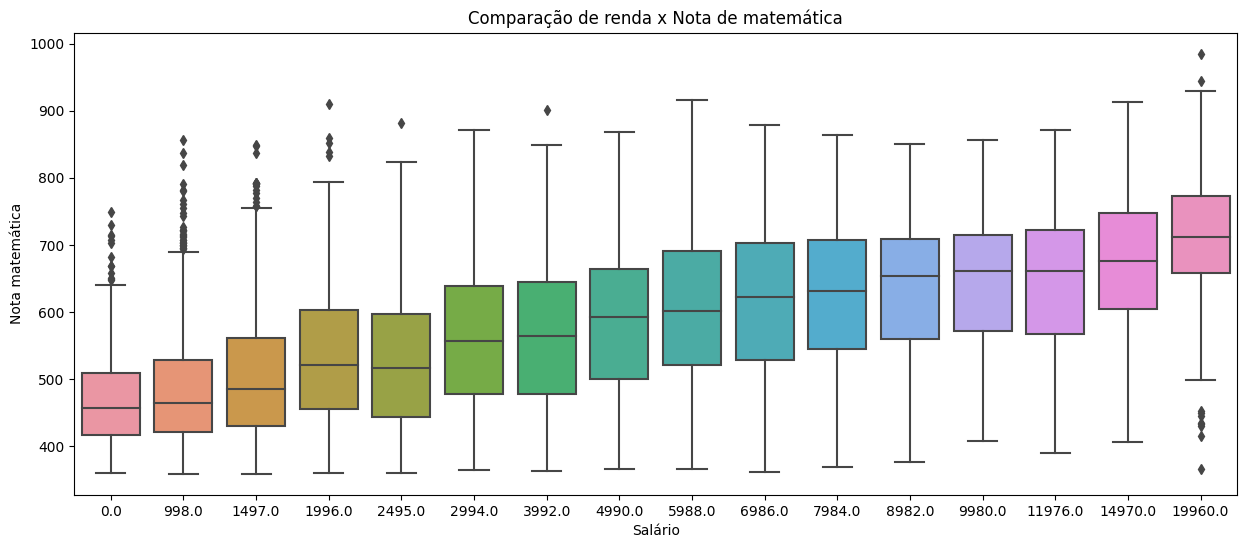

In [ ]:
# Boxplot do Seaborn para verificar as notas de matemática
plt.figure(figsize = (15, 6))
plt.title('Comparação de renda x Nota de matemática')

sns.boxplot(data = Base_Cruzada,
            x = 'Salário_Max',
            y = 'NU_NOTA_MT')

plt.xlabel('Salário')
plt.ylabel('Nota matemática');

In [ ]:
# Criando um novo DataFrame com mudança nos nomes dos campos para o heatmap

# Dicionário com novos nomes
new_columns = {'NU_IDADE': 'Idade',
               'NU_NOTA_CN': 'Ciências da natureza',
               'NU_NOTA_CH': 'Ciências humanas',
               'NU_NOTA_LC': 'Linguagens e códigos',
               'NU_NOTA_MT': 'Matemática',
               'NU_NOTA_REDACAO': 'Redação',
               'Salário_Max': 'Faixa Salarial'}
# mudança de nomes | pandas.DataFrame.rename()
correlacao = Base_Cruzada.rename(columns = new_columns)

# removendo a coluna 'TP_ESCOLA' | pandas.DataFrame.drop()
correlacao.drop(columns = ['TP_ESCOLA'], inplace = True)

# atribuindo um novo valor para a  variável correlação
correlacao = correlacao.corr()

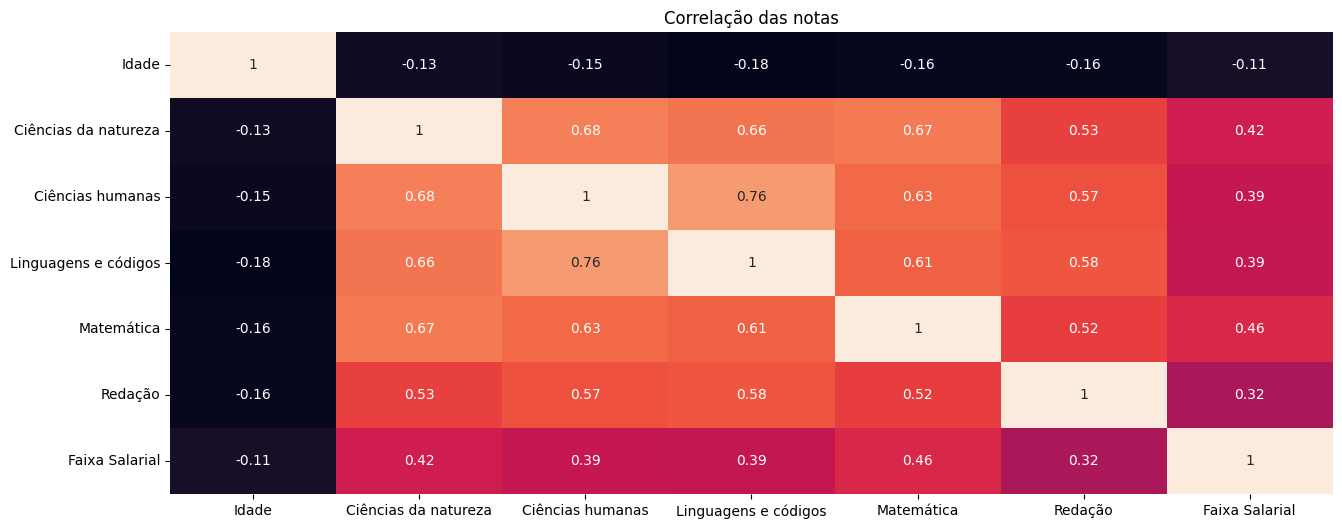

In [ ]:
# Gráfico de calor (heatmap)

plt.figure(figsize = (15, 6))
plt.title('Correlação das notas')

sns.heatmap(correlacao, annot = True, cbar = False);


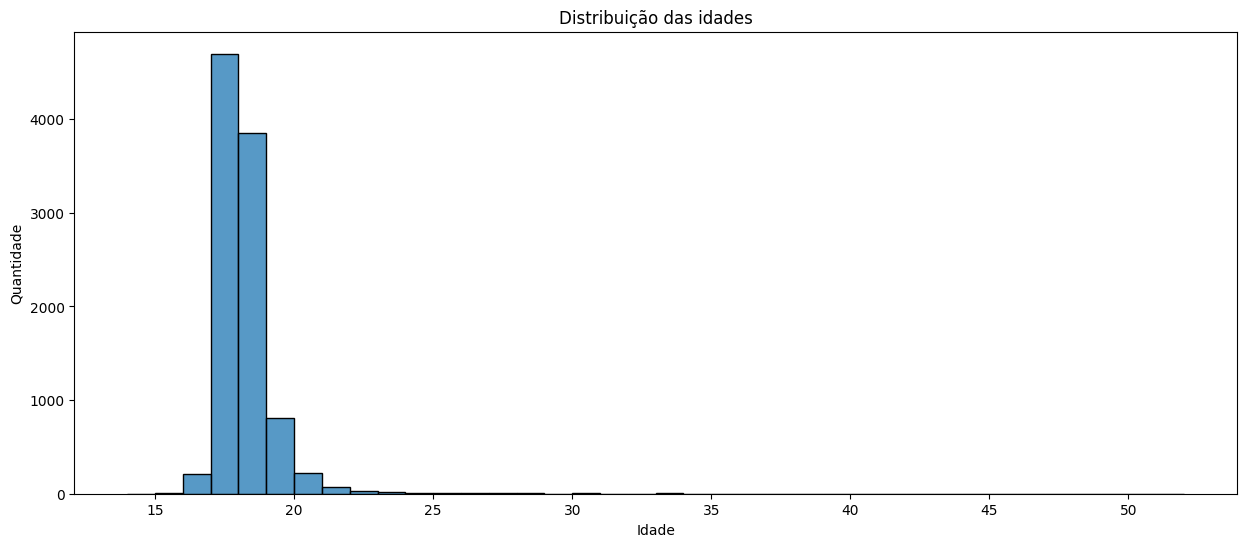

In [ ]:
# Gráfico de histograma (gráfico de contagem) para verificar a distribuição de idades

plt.figure(figsize = (15, 6))
plt.title('Distribuição das idades')

sns.histplot(data = Base_Cruzada,
             x = 'NU_IDADE',
             binwidth = 1)
plt.xlabel('Idade')
plt.ylabel('Quantidade');

In [ ]:
# Agrupando as médias das notas de matemática por região | pandas.DataFrame.groupby()
media_regiao =  Base_Cruzada.groupby(by = ['Região']).mean()['NU_NOTA_MT'].sort_values()

In [ ]:
media_regiao

Região
Norte           492.387671
Nordeste        506.999071
Centro-oeste    533.047955
Sul             547.278901
Sudeste         548.343449
Name: NU_NOTA_MT, dtype: float64

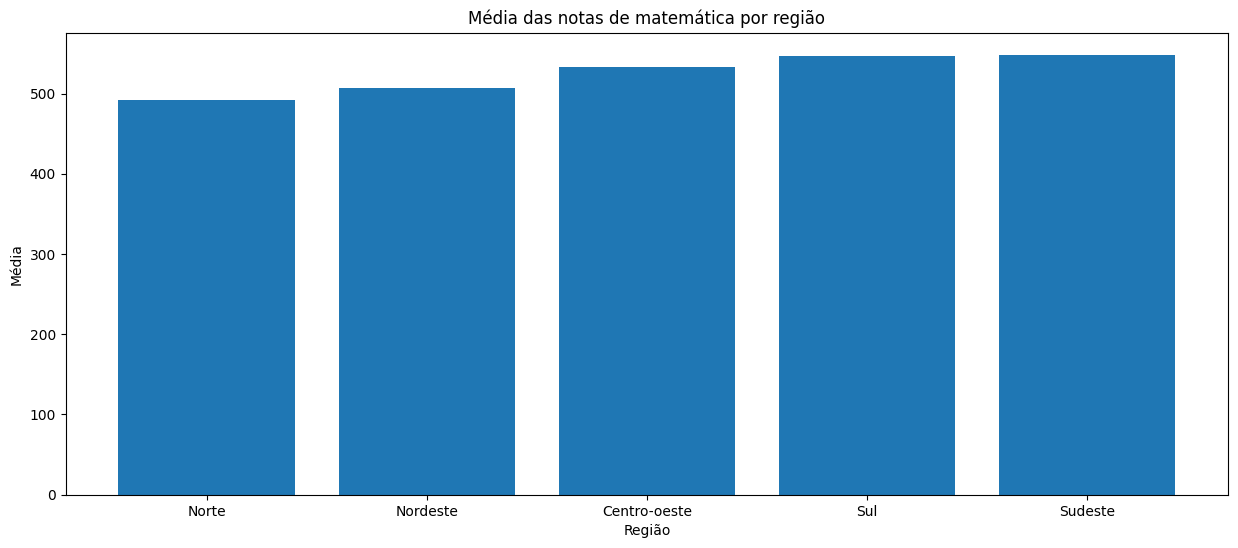

In [ ]:
# Gráfico de barras para verificar a média das notas de matemática por região
plt.figure(figsize = (15,6 ))
plt.title('Média das notas de matemática por região')

plt.bar(media_regiao.index, media_regiao)
plt.xlabel('Região')
plt.ylabel('Média');

# **Criate Report (Criar Relatório)**

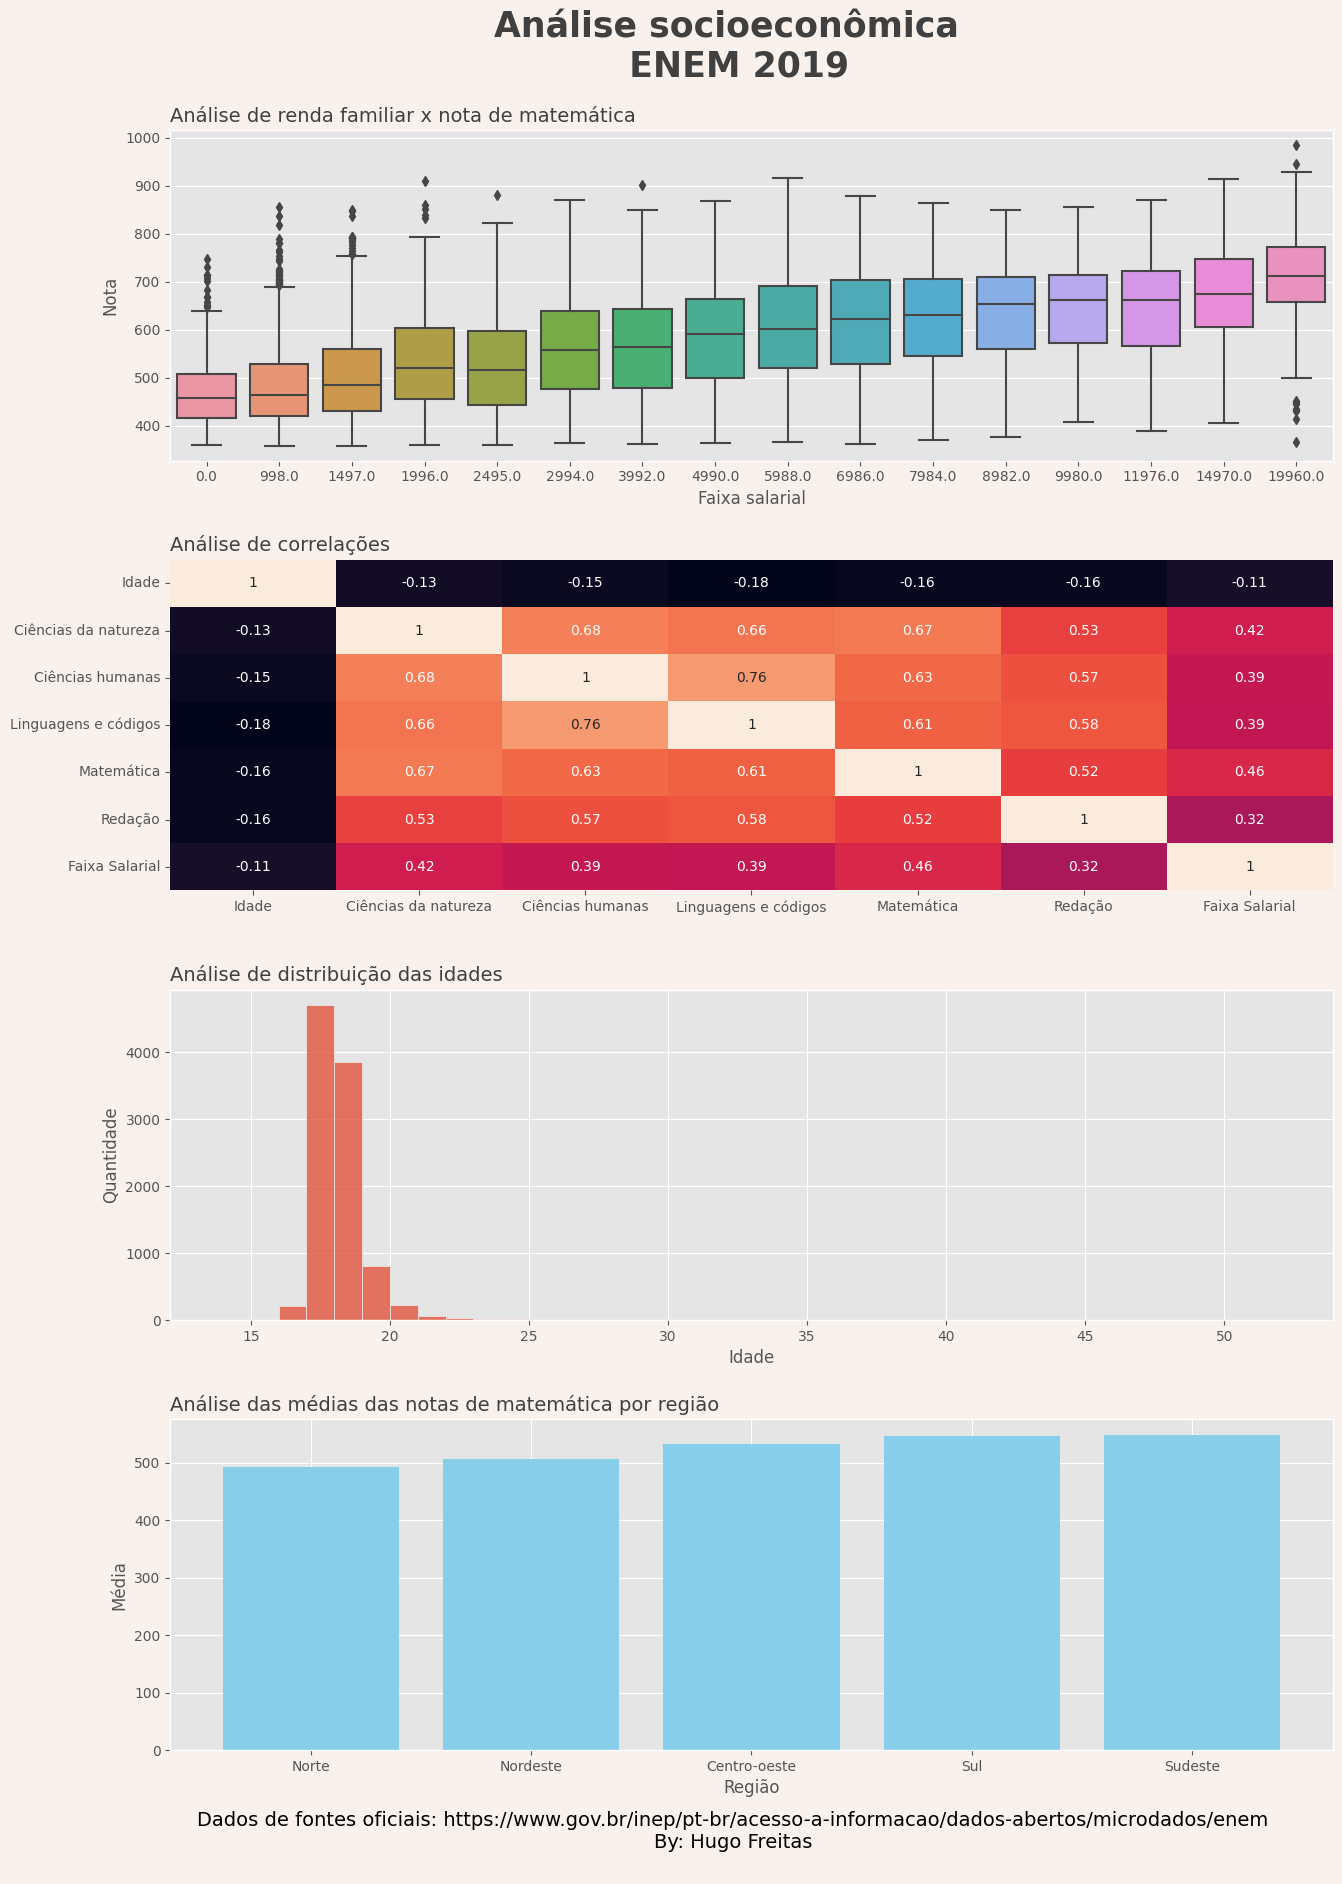

In [ ]:
# Tamanho do relatório
figura, eixo = plt.subplots(figsize = (15, 20))

# Background color (cor de fundo)
cor_fundo = '#f9f1ec'
eixo.set_facecolor(cor_fundo)
figura.set_facecolor(cor_fundo)

# Paleta de cores
paleta_cor = sns.color_palette('mako',7)

# Estilo do gráfico
plt.style.use('ggplot')

# Título principal
plt.suptitle('Análise socioeconômica \n ENEM 2019',
             fontsize = 25,
             color = '#404040',
             fontweight = 600)

# Estrutura do grid (quantidade de linhas e colunas)
rows = 4
columns = 1

### Gráfico 1 - boxplot ###
plt.subplot(rows, columns, 1)
plt.title('Análise de renda familiar x nota de matemática',
          loc = 'left',
          fontsize = '14',
          color = '#404040')
sns.boxplot(data = Base_Cruzada,
            x = 'Salário_Max',
            y = 'NU_NOTA_MT')
plt.xlabel('Faixa salarial')
plt.ylabel('Nota')

### Gráfico 2 - heatmap ###
plt.subplot(rows, columns, 2)
plt.title('Análise de correlações',
          loc = 'left',
          fontsize = '14',
          color = '#404040')
sns.heatmap(correlacao,
            annot = True,
            cbar = False)

### Gráfico 3 - histplot ###
plt.subplot(rows, columns, 3)
plt.title('Análise de distribuição das idades',
          loc = 'left',
          fontsize = 14,
          color = '#404040')
sns.histplot(Base_Cruzada, x = 'NU_IDADE', binwidth = 1)
plt.xlabel('Idade')
plt.ylabel('Quantidade')

### Gráfico 4 - gráfico de barras ###
plt.subplot(rows, columns, 4)
plt.title('Análise das médias das notas de matemática por região',
          loc = 'left',
          fontsize = 14,
          color = '#404040')
plt.bar(media_regiao.index, media_regiao, color = 'skyblue')
plt.xlabel('Região')
plt.ylabel('Média')


# Rodapé
rodape = '''
Dados de fontes oficiais: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem
By: Hugo Freitas
'''

# Ajuste da localização e tamanho o rodapé
figura.text(0.5, 0.05, rodape, ha = 'center', size = 14)

# Ajuste de layout
plt.subplots_adjust(top = 0.92, hspace = 0.3)

